In [1]:
library(ggplot2)
library(gridExtra)
library(ape)
library(spdep)
library(visreg)
library(mgcv)

Loading required package: sp

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Loading required package: sf

Linking to GEOS 3.5.1, GDAL 2.2.2, PROJ 4.9.2

Registered S3 method overwritten by 'spdep':
  method   from
  plot.mst ape 

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.



In [2]:
r=read.table('../Tables/transect_slopes.csv', header=T, sep=',')
r$id=as.factor(r$id)
r=r[r$depth==0.35,]
r$ang='downstream'
r[r$ang2<0,]$ang='upstream'

In [3]:
head(r)

Unnamed..0 id depth x         y         x1  y1  rep colony dir  ⋯ h      
4   48        2  0.35  -492.7313 -320.1897 373 180 II  1      flow ⋯  684.52
9   64        3  0.35  -492.7313 -319.4897 373 243 II  1      flow ⋯ 1055.12
18  80        4  0.35  -492.7313 -318.7897 373 306 II  1      flow ⋯ 1209.90
29  96        5  0.35  -492.7313 -318.0897 373 369 II  1      flow ⋯    0.00
38 112        6  0.35  -492.7313 -317.3897 373 432 II  1      flow ⋯    0.00
44 128        7  0.35  -492.7313 -316.6897 373 495 II  1      flow ⋯  906.88
   fast     slow     height2 slope.fast slope.slow dist2     ang2      
4  202.7328 174.0996 0.70850  80.63518  184.4918   0.4085506  74.963617
9  128.2068 101.8120 0.81750 228.07381  216.0207   0.9352494  68.163818
18  94.9858  57.2640 1.16194 173.47940  194.9870   1.0137329  51.752756
29  51.3380  38.7142 1.37558 173.83031  152.8570   1.1045361   2.383978
38  91.7738  69.8196 1.23606 136.38927  162.9887   0.8111872 -49.848043
44 182.0424 172.6998 0.86110  73.71485  102.1850   0.1116653 -67.484286
   dist       ang       
4  0.20030840 downstream
9  0.41350653 downstream
18 0.63255313 downstream
29 0.77690427 downstream
38 0.73350166 upstream  
44 0.08089011 upstream

In [246]:
options(repr.plot.width=13,repr.plot.height=8)
p1=ggplot(r, aes(x=height2,y=slope.fast,color=dist2))+
    geom_point()+theme_bw()
p2=ggplot(r, aes(x=dist2,y=slope.fast,color=height2))+
    geom_point()+theme_bw()
p3=ggplot(r, aes(x=ang2,y=slope.fast,color=height2))+
    geom_point()+theme_bw()
p4=ggplot(r, aes(x=height2,y=dist2,color=ang2))+
    geom_point()+theme_bw()
p5=ggplot(r, aes(x=height2,y=ang2,color=dist2))+
    geom_point()+theme_bw()
p6=ggplot(r, aes(x=height2,y=slope.fast,color=ang2))+
    geom_point()+theme_bw()

grid.arrange(p1,p2,p3,p4,p5,p6,ncol=3)

In [3]:
m=lm(slope.fast~poly(height2,2)*poly(dist2,2)*ang,data=r)
summary(m)


Call:
lm(formula = slope.fast ~ poly(height2, 2) * poly(dist2, 2) * 
    ang, data = r)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.337 -11.214  -0.985  13.902  32.245 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                     138.186      7.796  17.725
poly(height2, 2)1                               -47.338     60.542  -0.782
poly(height2, 2)2                               166.025     65.470   2.536
poly(dist2, 2)1                                 371.682     53.999   6.883
poly(dist2, 2)2                                  79.547     54.748   1.453
angupstream                                     -60.391     49.889  -1.210
poly(height2, 2)1:poly(dist2, 2)1             -1390.220    388.461  -3.579
poly(height2, 2)2:poly(dist2, 2)1              1143.247    501.958   2.278
poly(height2, 2)1:poly(dist2, 2)2              -960.743    348.657  -2.756
poly(height2, 2)2:poly(dist2, 2)2             -1004.

In [29]:
m1=lm(slope.fast~height2+dist2,data=r)
m2=lm(slope.fast~height2*dist2,data=r)
m3=lm(slope.fast~I(height2^2)*I(dist2^2),data=r)
m4=lm(slope.fast~I(height2^2)*dist2,data=r)
m5=lm(slope.fast~height2*I(dist2^2),data=r)

AIC(m1,m2,m3,m4)
anova(m4,m5,test='F')

df AIC     
m1 4  423.5508
m2 5  411.6630
m3 5  409.1062
m4 5  410.6688

Res.Df RSS      Df Sum of Sq F  Pr(>F)
1 38     34184.41 NA       NA  NA NA    
2 38     33406.32  0 778.0894  NA NA

In [4]:
m=lm(slope.fast~height2*dist2*ang,data=r)
m1=lm(slope.fast~height2*dist2,data=r[r$ang=='upstream',])
m2=lm(slope.fast~height2*dist2,data=r[r$ang=='downstream',])
summary(m)


Call:
lm(formula = slope.fast ~ height2 * dist2 * ang, data = r)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.358 -12.870   1.638  17.417  42.514 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -123.88      46.59  -2.659 0.011863 *  
height2                     168.50      41.63   4.047 0.000283 ***
dist2                       396.01      97.50   4.061 0.000271 ***
angupstream                 128.89      65.49   1.968 0.057248 .  
height2:dist2              -235.89      83.52  -2.824 0.007870 ** 
height2:angupstream        -123.78      67.35  -1.838 0.074840 .  
dist2:angupstream          -173.43     148.71  -1.166 0.251645    
height2:dist2:angupstream   129.02     117.39   1.099 0.279430    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.19 on 34 degrees of freedom
Multiple R-squared:  0.7297,	Adjusted R-squared:  0.6741 
F-statistic: 13.11 on 7 and 34 DF,  p-va

In [5]:
summary(m1)


Call:
lm(formula = slope.fast ~ height2 * dist2, data = r[r$ang == 
    "upstream", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-54.443 -11.471   0.575  14.310  41.274 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)      5.011     38.176   0.131   0.8967  
height2         44.719     43.914   1.018   0.3191  
dist2          222.584     93.138   2.390   0.0254 *
height2:dist2 -106.869     68.419  -1.562   0.1319  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.38 on 23 degrees of freedom
Multiple R-squared:  0.6742,	Adjusted R-squared:  0.6318 
F-statistic: 15.87 on 3 and 23 DF,  p-value: 8.267e-06


In [6]:
library(relaimpo)

Loading required package: MASS

Loading required package: boot

Loading required package: survey

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:boot’:

    aml



Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


Loading required package: mitools

This is the global version of package relaimpo.


If you are a non-US user, a version with the interesting additional metric pmvd is available


from Ulrike Groempings web site at prof.beuth-hochschule.de/groemping.




In [141]:
calc.relimp(m1,rela=T)

Response variable: slope.fast 
Total response variance: 2437.563 
Analysis based on 42 observations 

3 Regressors: 
height2 dist2 height2:dist2 
Proportion of variance explained by model: 64.98%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

                    lmg
height2       0.2535110
dist2         0.5352460
height2:dist2 0.2112429

Average coefficients for different model sizes: 

                     1X      2Xs       3Xs
height2        88.83433 31.49658  128.6550
dist2         104.60320 86.49793  347.3116
height2:dist2       NaN      NaN -219.1967

In [135]:
m=lm(slope.fast~height2*dist2*ang,data=r)
m1=lm(slope.fast~height2*dist2,data=r)
AIC(m,m1)
anova(m,m1,test='F')

df AIC     
m  9  408.7784
m1 5  411.6630

Res.Df RSS      Df Sum of Sq F        Pr(>F)    
1 34     27012.10 NA        NA       NA         NA
2 38     35003.25 -4 -7991.156 2.514607 0.05958847

In [74]:
summary(m1)


Call:
lm(formula = slope.fast ~ height2 * dist2, data = r[r$ang == 
    "upstream", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-54.443 -11.471   0.575  14.310  41.274 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)      5.011     38.176   0.131   0.8967  
height2         44.719     43.914   1.018   0.3191  
dist2          222.584     93.138   2.390   0.0254 *
height2:dist2 -106.869     68.419  -1.562   0.1319  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.38 on 23 degrees of freedom
Multiple R-squared:  0.6742,	Adjusted R-squared:  0.6318 
F-statistic: 15.87 on 3 and 23 DF,  p-value: 8.267e-06


In [75]:
summary(m2)


Call:
lm(formula = slope.fast ~ height2 * dist2, data = r[r$ang == 
    "downstream", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-77.358 -17.376   7.414  20.840  42.514 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -123.88      59.88  -2.069  0.06292 . 
height2         168.50      53.52   3.149  0.00927 **
dist2           396.01     125.33   3.160  0.00908 **
height2:dist2  -235.89     107.36  -2.197  0.05033 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.23 on 11 degrees of freedom
Multiple R-squared:  0.7496,	Adjusted R-squared:  0.6813 
F-statistic: 10.98 on 3 and 11 DF,  p-value: 0.001234


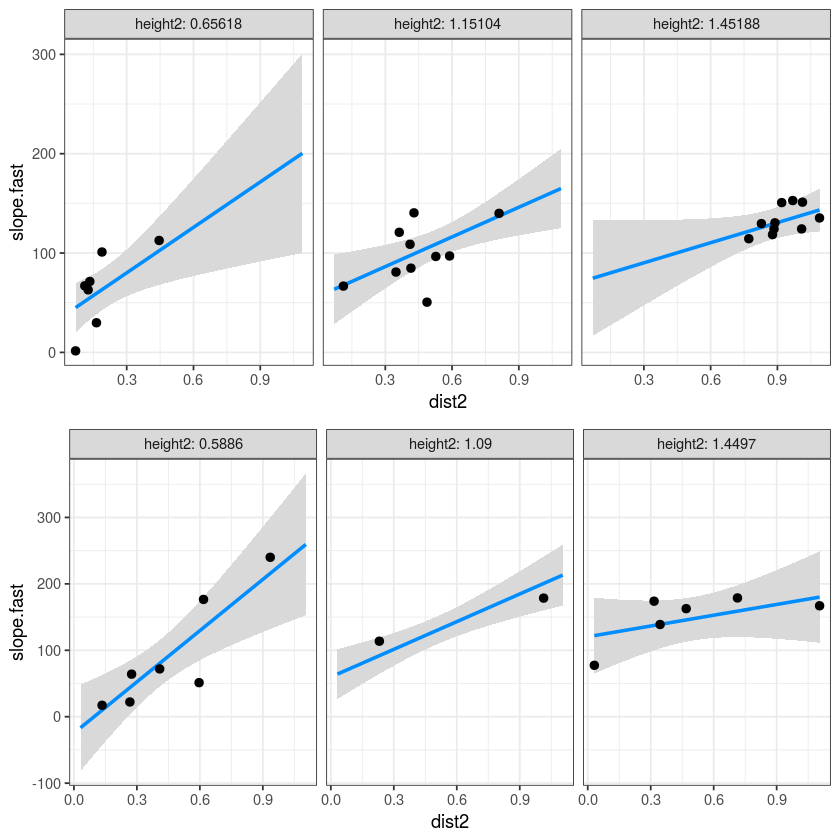

In [78]:
g1=visreg(m, "dist2", by="height2", overlay=TRUE,gg=T)
g1=visreg(m1, "dist2", by="height2",gg=T)
g1=g1+geom_point(size=2)+theme_bw()
g2=visreg(m2, "dist2", by="height2",gg=T)
g2=g2+geom_point(size=2)+theme_bw()
grid.arrange(g1,g2,ncol=1)
# Demonstrate that the lines are predictions from the model, at constant height:
# p <- predict(m, newdata=data.frame(dist2=0:1.5:0.1, height2=1.11))
# points(0:1.5:0.1, p)

In [81]:
visreg(m, "ang",by='height2')

In [87]:
g2=visreg(m, "ang",gg=T)


Warning message:
“  Note that you are attempting to plot a 'main effect' in a model that contains an
  interaction.  This is potentially misleading; you may wish to consider using the 'by'
  argument.”


Conditions used in construction of plot
dist2: 0.4573013
height2: 1.13033


In [27]:
names(r)[15]='height2'

In [35]:
m=lm(slope.fast~dist2*height2,data=r)
g1=visreg(m, "dist2", by="height2",gg=T,breaks=c(0.6,.9,1.4))
g1=g1+geom_point(size=2)+theme_bw()+ylab('slope [μmol l⁻¹ mm⁻¹]')+xlab('distance from cluster side [mm]')
g2=visreg(m, "height2", by="dist2",gg=T,breaks=c(0.1,0.3,.6))
g2=g2+geom_point(size=2)+theme_bw()+ylab('slope [μmol l⁻¹ mm⁻¹]')+xlab('biofilm height [mm]')
svg('../plots-figures/FinalFigures/Fig6/panelC.svg', width=5, height=2)#, res=300, units='in')
g1
dev.off()

png 
  2